In [2]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [3]:
data=pl.read_csv("churn.csv").drop("RowNumber","CustomerId","Surname")
data

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,str,str,i64,i64,f64,i64,i64,i64,f64,i64
619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1
608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0
502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1
699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0
850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0
…,…,…,…,…,…,…,…,…,…,…
771,"""France""","""Male""",39,5,0.0,2,1,0,96270.64,0
516,"""France""","""Male""",35,10,57369.61,1,1,1,101699.77,0
709,"""France""","""Female""",36,7,0.0,1,0,1,42085.58,1


In [4]:
data.describe()

statistic,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",10000.0,"""10000""","""10000""",10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",650.5288,null,null,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037
"""std""",96.653299,null,null,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
"""min""",350.0,"""France""","""Female""",18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
"""25%""",584.0,null,null,32.0,3.0,0.0,1.0,0.0,0.0,51011.29,0.0
"""50%""",652.0,null,null,37.0,5.0,97208.46,1.0,1.0,1.0,100200.4,0.0
"""75%""",718.0,null,null,44.0,7.0,127642.44,2.0,1.0,1.0,149384.43,0.0
"""max""",850.0,"""Spain""","""Male""",92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0


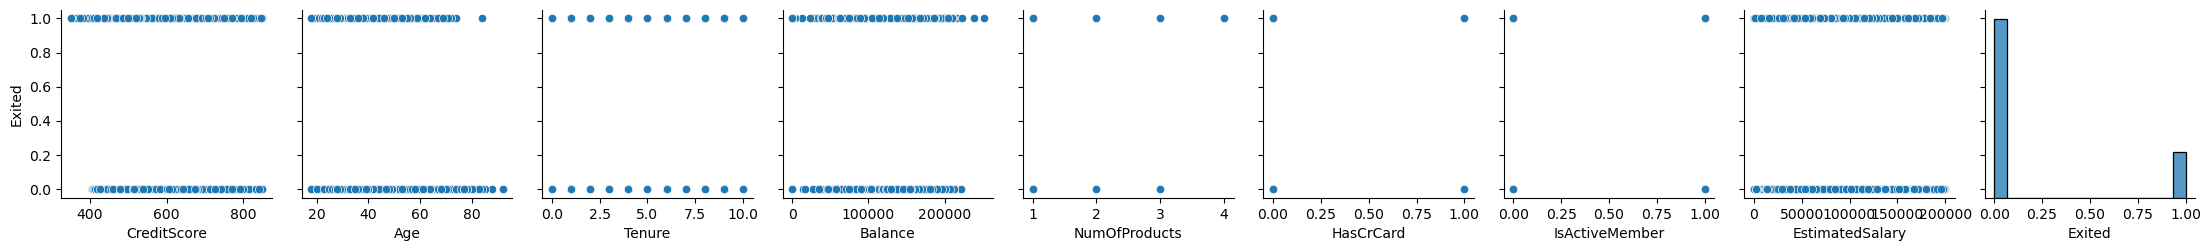

In [5]:
sns.pairplot(data.to_pandas(),y_vars=["Exited"])
plt.show()

# Imbalanced dataSet

In [6]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.drop("Exited").columns if data[col].dtype!= pl.String]

# Categorical EDA

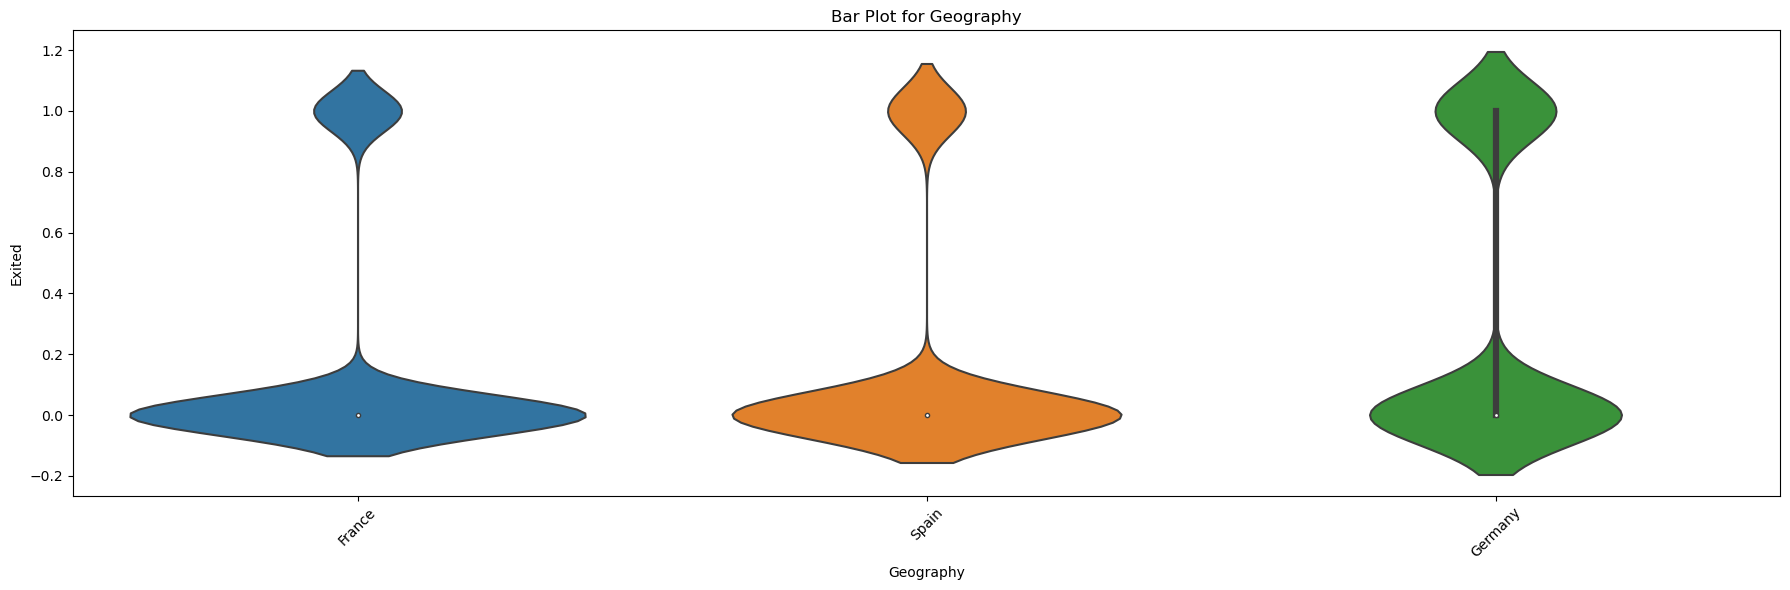

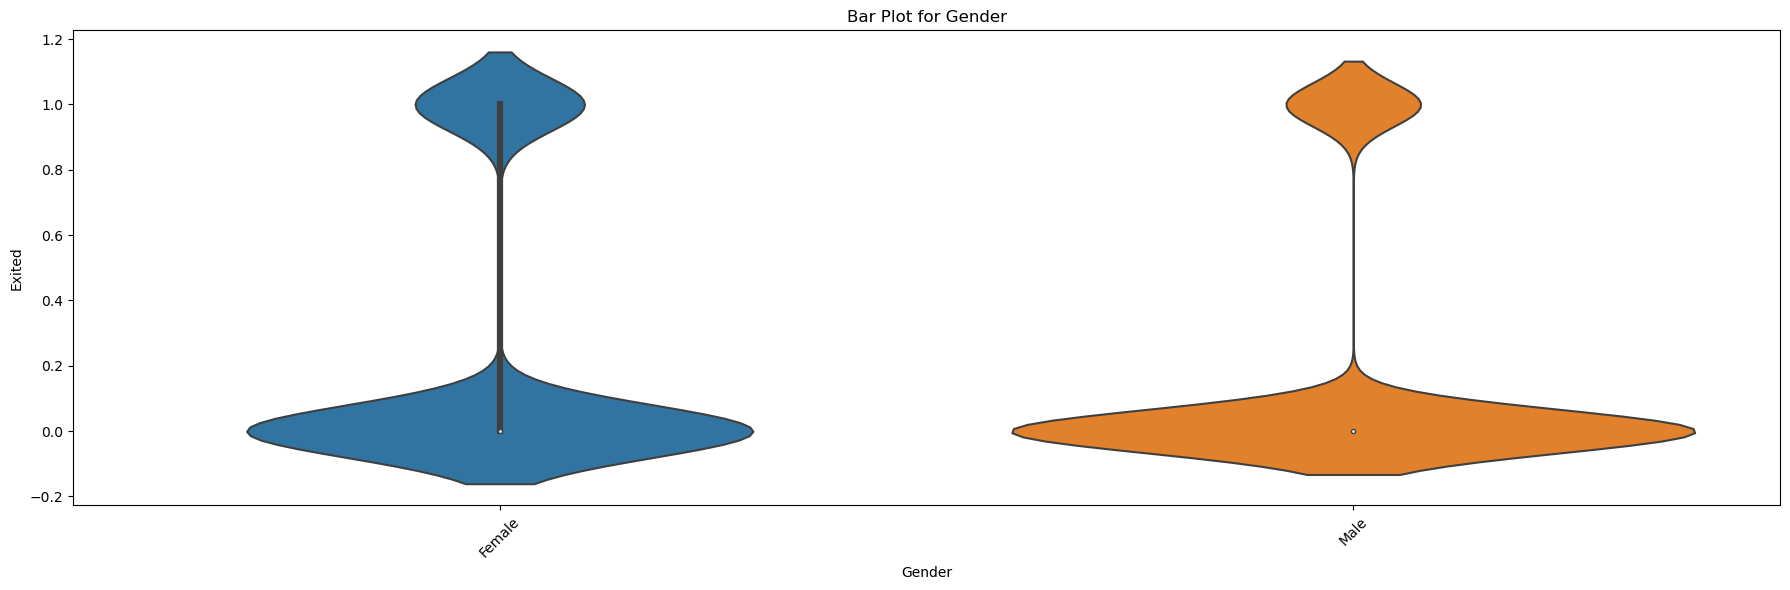

In [7]:
categorical_violin_plot(data.to_pandas(),cat_cols,"Exited")

In [8]:
perform_non_normal_kruskal_hypothesis(data,cat_cols,"Exited")

Kruskal-Wallis H-statistic: 301.22521129066496
P-value: 3.888449500851512e-66
There is a significant difference in Exited between different Geography categories.
Kruskal-Wallis H-statistic: 113.43775539389111
P-value: 1.7302867496277846e-26
There is a significant difference in Exited between different Gender categories.


In [9]:
for i in cat_cols:
    print(data[i].value_counts())

shape: (3, 2)
┌───────────┬───────┐
│ Geography ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Spain     ┆ 2477  │
│ France    ┆ 5014  │
│ Germany   ┆ 2509  │
└───────────┴───────┘
shape: (2, 2)
┌────────┬───────┐
│ Gender ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ Male   ┆ 5457  │
│ Female ┆ 4543  │
└────────┴───────┘


# Numerical EDA

## Univariate Analysis

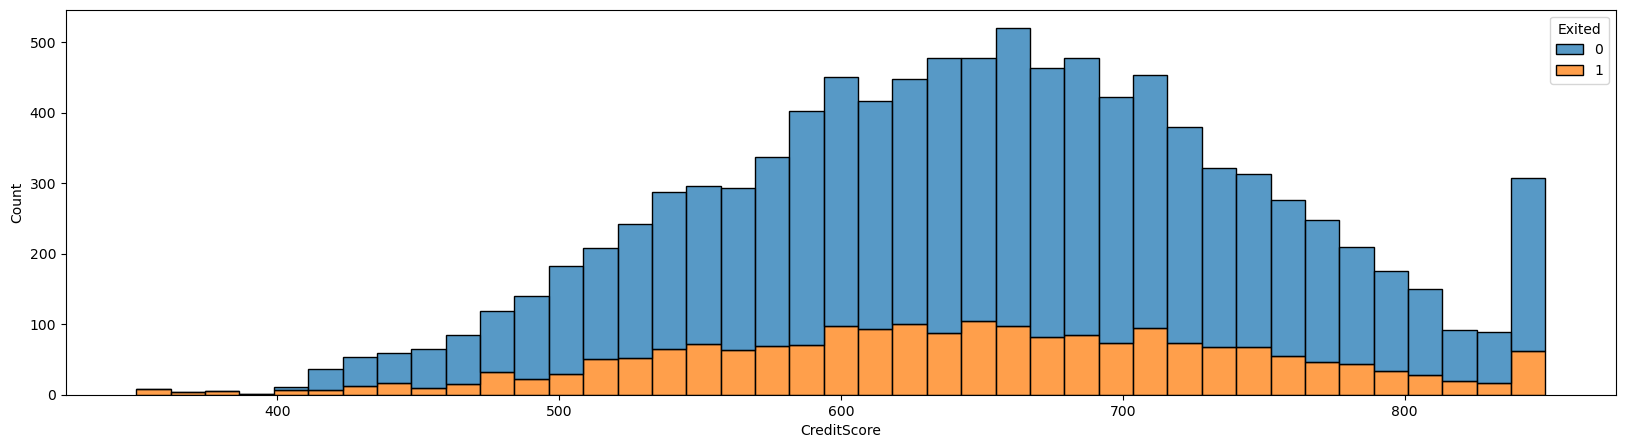

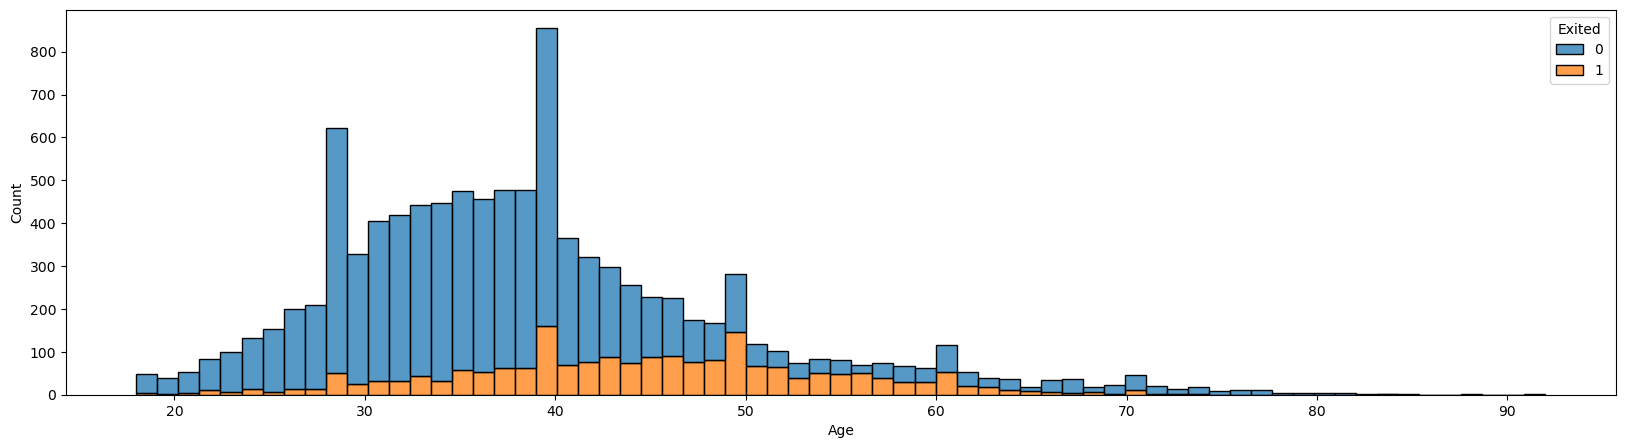

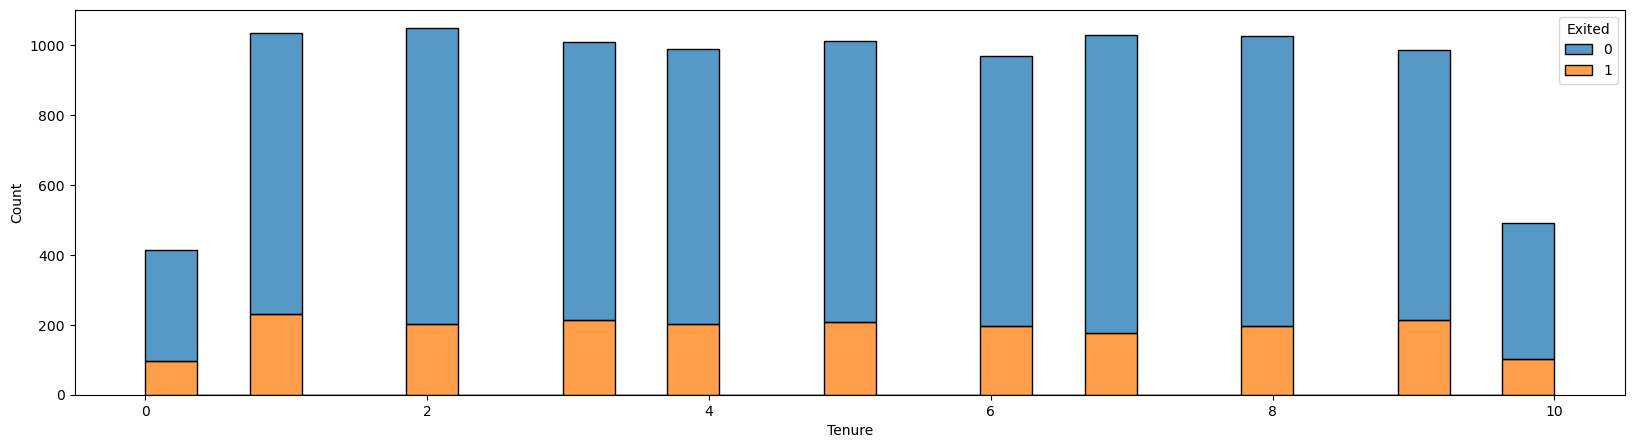

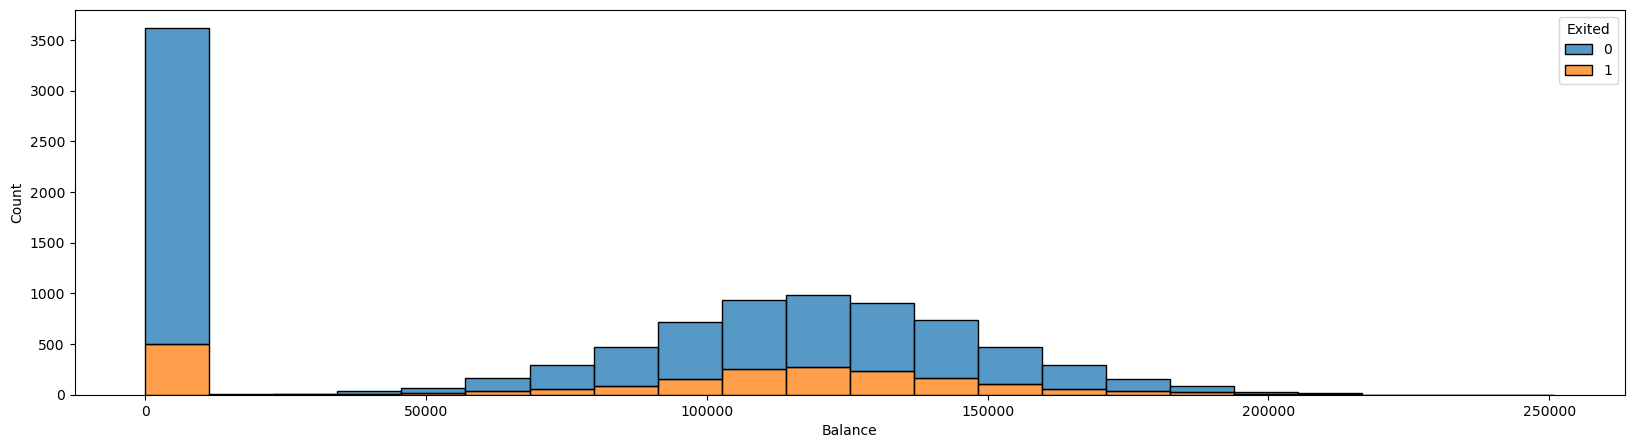

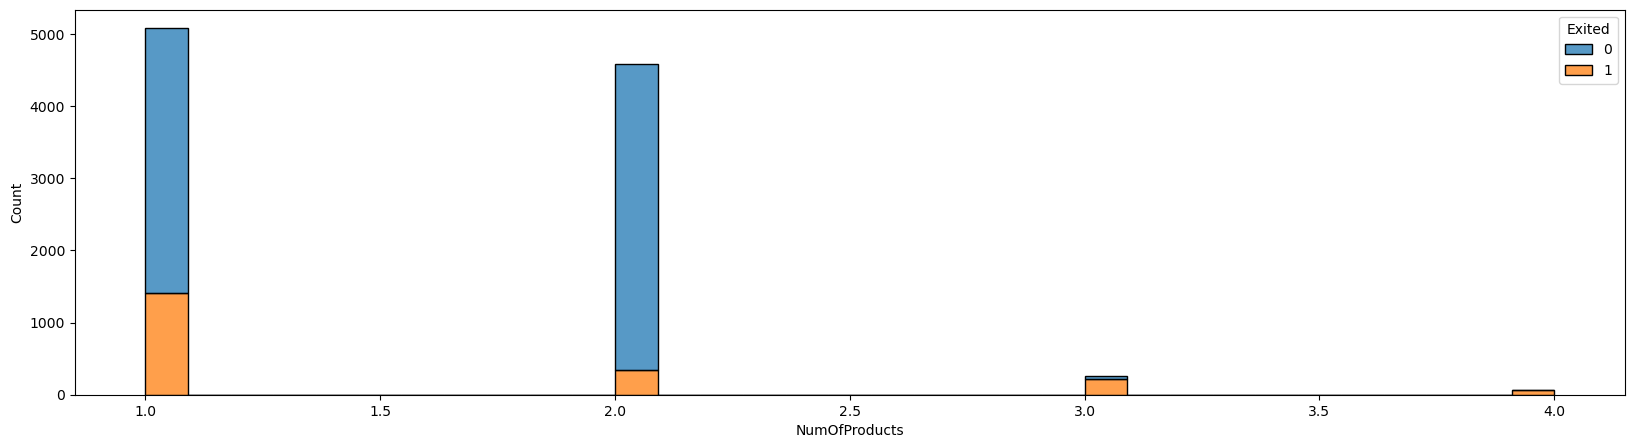

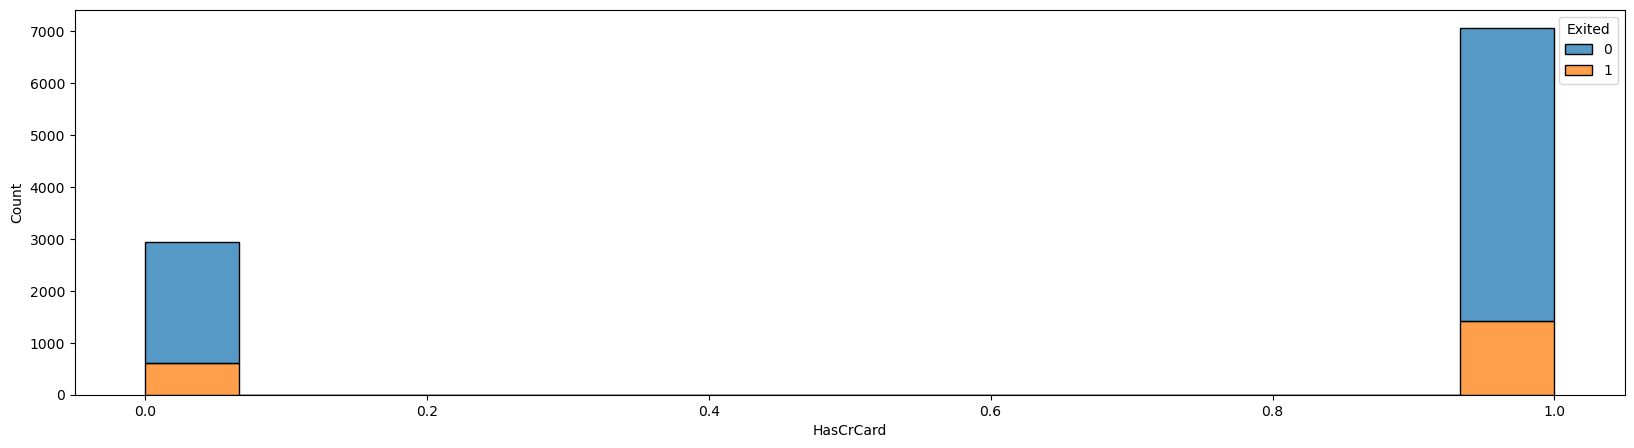

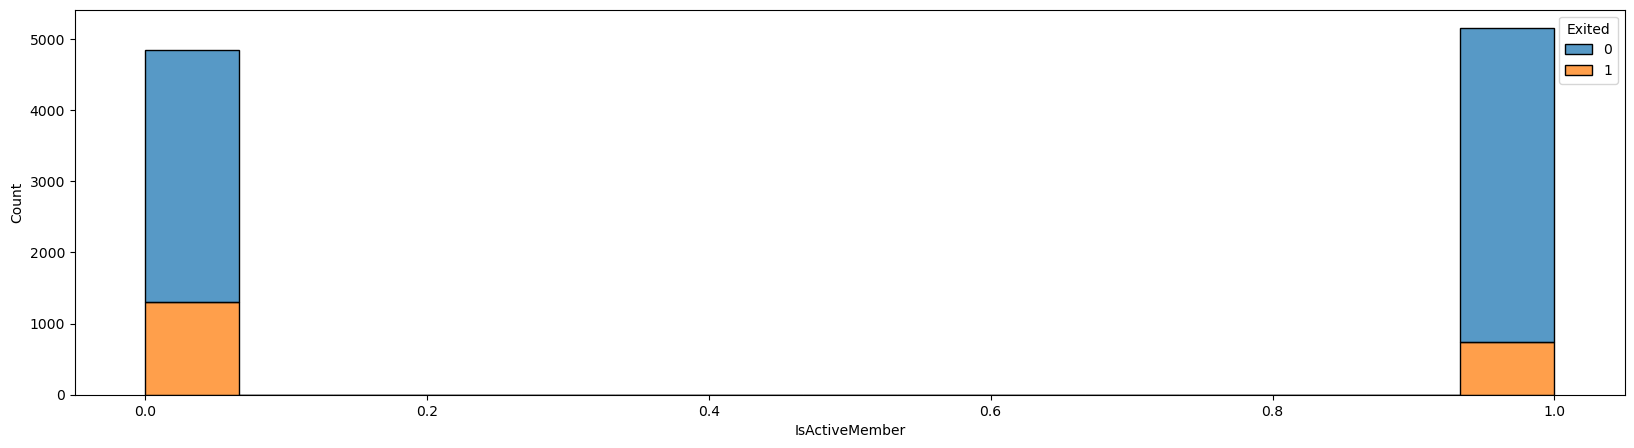

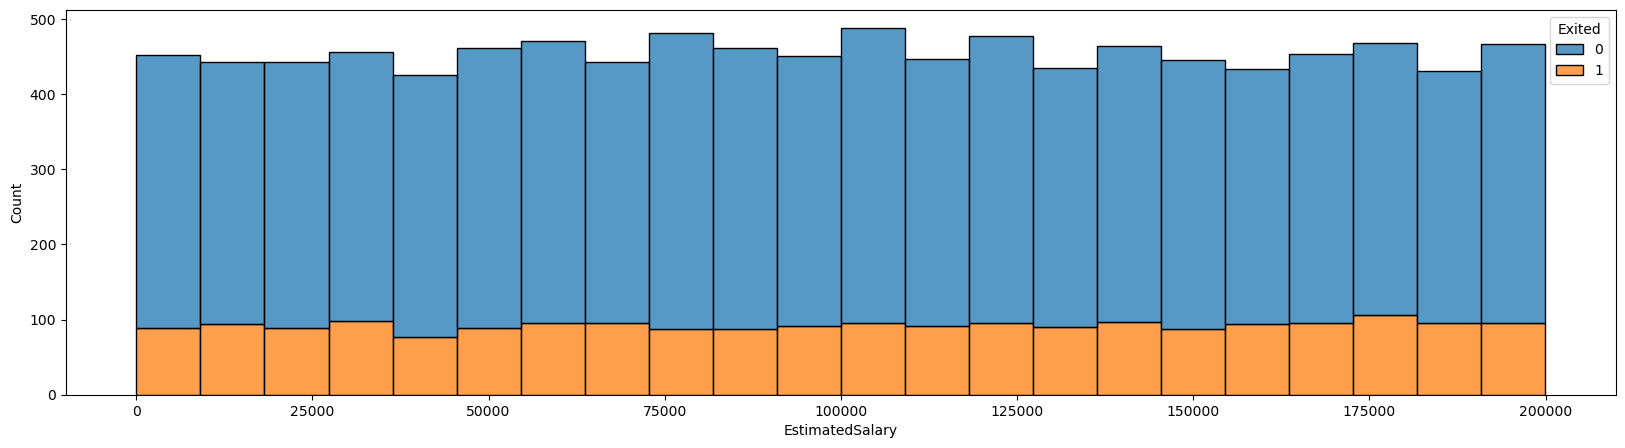

In [10]:
num_stack_plot(data,num_cols,"Exited")

## Bivariate Analysis

In [11]:
# sns.pairplot(data[num_cols+["Exited"]].to_pandas(),hue='Exited')

KeyboardInterrupt: 

In [1]:
px.scatter(x=data["IsActiveMember"]*data["NumOfProducts"]*data["EstimatedSalary"],y=data['Tenure'],color=data['Exited'])

NameError: name 'px' is not defined

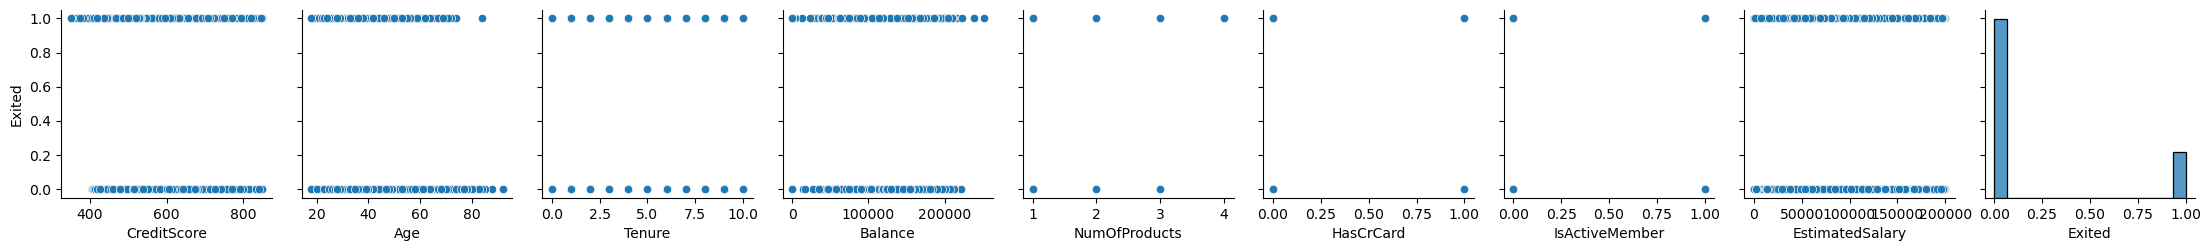

In [ ]:
sns.pairplot(data[num_cols+["Exited"]].to_pandas(),y_vars="Exited")

In [ ]:
# df=data.with_columns(data["Age"].map_elements(lambda x: x>39 & x<55).cast(pl.Float64).alias("middleage"))
# num_cols.append("middleage")

In [ ]:
df=data.with_columns(pl.Series(data["IsActiveMember"]*data["NumOfProducts"]*data["EstimatedSalary"]).alias("fe1"))
num_cols.append('fe1')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
X=df.drop("Exited").to_pandas()
y=df["Exited"].to_pandas()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)
enc = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("enc", enc),
        ("classifier", LogisticRegression(max_iter=10000,class_weight={0: 1, 1: 4})),
    ]
)
pipe

Pipeline(steps=[('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary',
                                                   'fe1'])])),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 4},
                                    max_iter=10000))])

In [ ]:
pipe.fit(X_train,y_train)
y_probs = pipe.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.5
predictions = (y_probs >= threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
print("logistic reg",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic reg 0.7056
auc roc 0.7003717119967161
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1991
           1       0.38      0.69      0.49       509

    accuracy                           0.71      2500
   macro avg       0.64      0.70      0.64      2500
weighted avg       0.79      0.71      0.73      2500



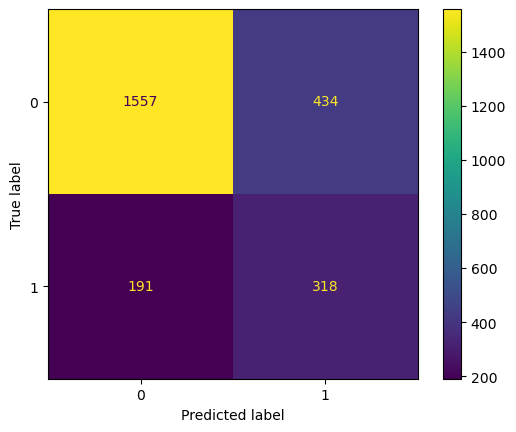

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions))
disp.plot()

In [ ]:
y_probs = pipe.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.9
y_pred = (y_probs >= threshold).astype(int)

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision for class 1: {precision}')

Precision for class 1: 0.7317073170731707


In [ ]:
fpr, tpr, thresholds=roc_curve(y_test,predictions)

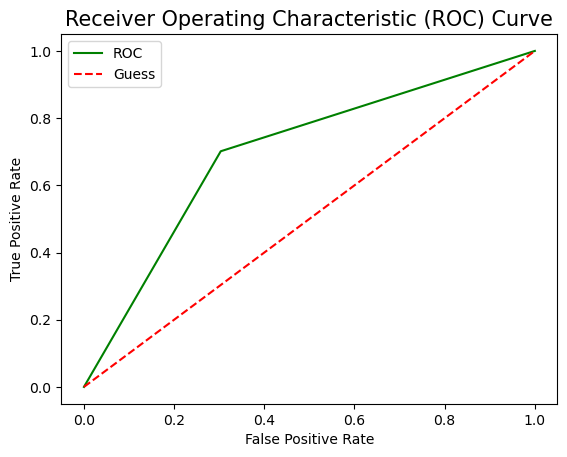

In [ ]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Guess')
    
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [4]:
data1=pl.read_csv("churn.csv").drop("RowNumber","Surname")
data1

CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,str,str,i64,i64,f64,i64,i64,i64,f64,i64
15634602,619,"""France""","""Female""",42,2,0.0,1,1,1,101348.88,1
15647311,608,"""Spain""","""Female""",41,1,83807.86,1,0,1,112542.58,0
15619304,502,"""France""","""Female""",42,8,159660.8,3,1,0,113931.57,1
15701354,699,"""France""","""Female""",39,1,0.0,2,0,0,93826.63,0
15737888,850,"""Spain""","""Female""",43,2,125510.82,1,1,1,79084.1,0
…,…,…,…,…,…,…,…,…,…,…,…
15606229,771,"""France""","""Male""",39,5,0.0,2,1,0,96270.64,0
15569892,516,"""France""","""Male""",35,10,57369.61,1,1,1,101699.77,0
15584532,709,"""France""","""Female""",36,7,0.0,1,0,1,42085.58,1


In [5]:
import featuretools as ft

In [34]:
features=data1.drop("Exited").to_pandas()
target=data1[['CustomerId','Exited']].to_pandas()

In [35]:
target["targetId"]=target["CustomerId"]

In [36]:
es = ft.EntitySet(id="customer_data")
es.add_dataframe(dataframe_name="customer",dataframe=features,index="CustomerId")
es.add_dataframe(dataframe_name="target",dataframe=target,index="targetId")
es

Entityset: customer_data
  DataFrames:
    customer [Rows: 10000, Columns: 11]
    target [Rows: 10000, Columns: 3]
  Relationships:
    No relationships

In [37]:
es.add_relationship("customer", "CustomerId", "target", "CustomerId")

Entityset: customer_data
  DataFrames:
    customer [Rows: 10000, Columns: 11]
    target [Rows: 10000, Columns: 3]
  Relationships:
    target.CustomerId -> customer.CustomerId

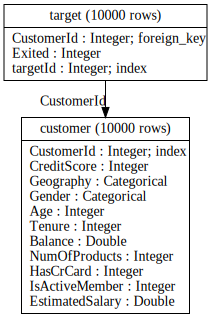

In [38]:
es.plot()

In [39]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="target")

feature_matrix

,CustomerId,Exited,customer.CreditScore,customer.Geography,customer.Gender,customer.Age,customer.Tenure,customer.Balance,customer.NumOfProducts,customer.HasCrCard,customer.IsActiveMember,customer.EstimatedSalary,customer.COUNT(target),customer.MAX(target.Exited),customer.MEAN(target.Exited),customer.MIN(target.Exited),customer.SKEW(target.Exited),customer.STD(target.Exited),customer.SUM(target.Exited)
targetId,,,,,,,,,,,,,,,,,,,
15634602,15634602,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,1.0,1.0,NaN,NaN,1.0
15647311,15647311,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,0.0,0.0,0.0,NaN,NaN,0.0
15619304,15619304,1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,1.0,1.0,NaN,NaN,1.0
15701354,15701354,0,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0.0,0.0,0.0,NaN,NaN,0.0
15737888,15737888,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,15606229,0,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0.0,0.0,0.0,NaN,NaN,0.0
15569892,15569892,0,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0.0,0.0,0.0,NaN,NaN,0.0
15584532,15584532,1,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,1.0,1.0,NaN,NaN,1.0


In [42]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="target",
    agg_primitives=["count"],
    max_depth=10,
)
feature_matrix

,CustomerId,Exited,customer.CreditScore,customer.Geography,customer.Gender,customer.Age,customer.Tenure,customer.Balance,customer.NumOfProducts,customer.HasCrCard,customer.IsActiveMember,customer.EstimatedSalary,customer.COUNT(target)
targetId,,,,,,,,,,,,,
15634602,15634602,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,15647311,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1
15619304,15619304,1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,15701354,0,699,France,Female,39,1,0.00,2,0,0,93826.63,1
15737888,15737888,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,15606229,0,771,France,Male,39,5,0.00,2,1,0,96270.64,1
15569892,15569892,0,516,France,Male,35,10,57369.61,1,1,1,101699.77,1
15584532,15584532,1,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [3]:
print("this is about github and")

this is about github and
